### Nucleotide Sequence Alignment using NCBI BLAST Tool

#### Import necessary modules from the Biopython library

In [1]:
from Bio.Blast import NCBIWWW # Handles BLAST queries
from Bio import SeqIO, SearchIO # Reads sequence files, & parses BLAST results

#### Read a FASTA file containing a nucleotide sequence data

In [19]:
nuc_record = SeqIO.read("Cotton leaf curl Multan virus satellite U36-1.fasta", format = "fasta")

#### Print out some basic information about the query sequence record stored in the variable 'nuc_record'

In [3]:
print("Length:" + "\n" + str(len(nuc_record)) + "\n")  # Display the length of the sequence
print("Description:" + "\n" + nuc_record.description + "\n")  # Display the sequence description
print("Sequence:" + "\n" + nuc_record.seq) # Display the nucleotide sequence

Length:
1350

Description:
NC_007721.1 Cotton leaf curl Multan virus satellite U36-1, complete genome

Sequence:
ACCGGATGGACGCGCATTTTTAAAAGTGTGCCCCACATGTCTGTACTATTCACTGCTTTTTTAAAAGTGTGCCCCACATGTCTGTACTATTCACTGTAGATGATTGAATGTTGTCAGAATGTAATCATTGCATATTCAAATTTCAAATTAAATGTATCCGGATTAGAAAGTCATGCTTGCCGTGACTTTCCTAGAACTTGCTGGGCAAGTTTGTCACATTATAAATCATGGGGGGGTGGTTGCACTAATGCAACCAATGGCTTCAATACCTTGGACCCATAACCAATGCTGGGTATGGCTCTGCAGATAATGTTAGCTACCAGTATATAGGATGTTTAGGAAATAATATTGTATTTGATATCCCTCGTGATAAGAATGATTATCTACAATATAGTTTAATTGAGATGTTTAAGGATAGATTAGTAGTTAGTAATAATTATGAGCCGCTTATGGCCCCTCTACTTAATTGTATTCATGTTGTAGTTATGTCTAATTTTCTCCCAGACTTCGAGAAGATTAGCGTAGATAGAGTCCATGTAATCCCATGTAAACCATGTGGTGTTTGTCTTAAACACCATAATATTGATAATAAATGTGAGGATTATATTGAATAAATAATTTTGTTTCTTGAAAACAAGAAAGAATGCAATGAAAAAAAAAAACAAACAAAAAAACATGAGCCCTCTATTATTTTAAGAGAAAACATGGCCGCGCAGCGGCCCATTGAAAAAAAATTAATATGGAAGTAAAAAATATTTCACTAAAACGACGATGTATTGAAAAAGTTGAAATGGGACTAAATTGTAAATATGGGCCTGGCCCAGAATCAGCTTAGTGGGTCCTATTTTGAAATAAATAATTATTTAGGAGGCCAGAAATGTTTATCT

#### Perform a BLAST search of the query sequence against the NCBI nucleotide (nt) database

In [4]:
result_handle = NCBIWWW.qblast("blastn", "nt", nuc_record.seq) # The blastn program is specified for nucleotide BLAST

####  Read the BLAST results from the search and save them in a variable

In [5]:
blast_result = SearchIO.read(result_handle, "blast-xml") # The BLAST results are parsed in XML format

#### Print the first 5 BLAST hits to review their information

In [6]:
print(blast_result[0:5]) 

Program: blastn (2.15.0+)
  Query: No (1350)
         definition line
 Target: nt
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  gi|85362699|ref|NC_007721.1|  Cotton leaf curl Multan v...
            1      1  gi|84616313|emb|AJ620463.1|  Cotton leaf curl Multan vi...
            2      5  gi|10336823|gb|U81302.1|U81302  Nicotiana tabacum clone...
            3      5  gi|10336826|gb|U81308.1|U81308  Nicotiana tomentosiform...
            4      5  gi|10336816|gb|U81305.1|U81305  Nicotiana kawakamii clo...


#### Find all the exact matches to the query sequence

In [59]:
# Iterate through hits to find exact matches to the query sequence
exact_matches = []
for hit in blast_result:
    for hsp in hit.hsps:
        if hsp.ident_num / len(hsp.query) == 1.0:  # Check if the alignment is an exact match
            exact_matches.append((hit.id, hsp.evalue, hsp.bitscore))

# Display details of all exact matches
print("Exact Matches:")
for i, (seq_id, evalue, bitscore) in enumerate(exact_matches, 1):
    print(f"Exact Match {i}:")
    print(f"Sequence ID: {seq_id}")
    print(f"E-value: {evalue}")
    print(f"Alignment Score: {bitscore}")
    print()

Exact Matches:
Exact Match 1:
Sequence ID: gi|85362699|ref|NC_007721.1|
E-value: 0.0
Alignment Score: 2435.83

Exact Match 2:
Sequence ID: gi|84616313|emb|AJ620463.1|
E-value: 0.0
Alignment Score: 2435.83



In the above results, "Exact Match 1" is the query sequence itself. So there is only one exact match to the query sequence that is "Exact Match 2."

#### Find the closest non-exact match, and a count of the remaining non-exact matches

In [94]:
# Initialize variables
closest_hit = None
closest_evalue = float('inf')  # Initialize with positive infinity
non_exact_match_count = 0  # Counter for non-exact matches

# Iterate through hits excluding index 0 (query sequence)
for hit in blast_result[1:]:
    is_exact_match = False
    for hsp in hit.hsps:
        if hsp.ident_num / len(hsp.query) == 1.0:  # Check if the alignment is an exact match
            is_exact_match = True
            break  # No need to check other HSPs if one is an exact match
    if is_exact_match:
        continue  # Skip this hit if it's an exact match

    # Since this hit is not an exact match, increment the non-exact match counter
    non_exact_match_count += 1

    # Find the closest non-exact match based on E-value
    for hsp in hit.hsps:
        if hsp.evalue < closest_evalue:
            closest_hit = hit
            closest_evalue = hsp.evalue

# Adjust the count to exclude the closest non-exact match if any non-exact match is found
if closest_hit:
    remaining_non_exact_matches = non_exact_match_count - 1
else:
    remaining_non_exact_matches = 0

# Output results
if closest_hit is None:
    print("No non-exact matches found.")
else:
    print(f"Closest non-exact match: {closest_hit.id}")
    print(f"E-value: {closest_evalue}")
    print(f"Alignment score: {closest_hit.hsps[0].bitscore}")
    print(f"Remaining non-exact matches: {remaining_non_exact_matches}")

Closest non-exact match: gi|10336823|gb|U81302.1|U81302
E-value: 0.0
Alignment score: 847.968
Remaining non-exact matches: 47


#### Print out details of the query sequence, exact match, and first non-exact match

In [65]:
# Display details of the query sequence which is the first blast hit (index 0/Exact Match 1)
query_hsp = blast_result[0].hsps[0]
print("Query Sequence:")
print(f"Sequence ID: {blast_result[0].id}")
print(f"Sequence Description: {blast_result[0].description}")
print(f"E-value: {query_hsp.evalue}")
print(f"Alignment score: {query_hsp.bitscore}")
print(f"Alignment:\n{query_hsp.aln}\n")

# Display details of the exact match
exact_match_hsp = blast_result[1].hsps[0]
print("Exact Match:")
print(f"Sequence ID: {blast_result[1].id}")
print(f"Sequence Description: {blast_result[1].description}")
print(f"E-value: {exact_match_hsp.evalue}")
print(f"Alignment score: {exact_match_hsp.bitscore}")
print(f"Alignment:\n{exact_match_hsp.aln}\n")

# Display details of the first non-exact match
first_non_exact_match = non_exact_matches[0]  # Assuming non_exact_matches has been populated earlier
first_non_exact_hit = [hit for hit in blast_result[1:] if hit.hsps[0].evalue == first_non_exact_match[0] and hit.hsps[0].bitscore == first_non_exact_match[1]][0]
first_non_exact_hsp = first_non_exact_hit.hsps[0]
print("First Non-exact Match:")
print(f"Sequence ID: {first_non_exact_hit.id}")
print(f"Sequence Description: {first_non_exact_hit.description}")
print(f"E-value: {first_non_exact_match[0]}")
print(f"Alignment score: {first_non_exact_hsp.bitscore}")
print(f"Alignment:\n{first_non_exact_hsp.aln}\n")

Query Sequence:
Sequence ID: gi|85362699|ref|NC_007721.1|
Sequence Description: Cotton leaf curl Multan virus satellite U36-1, complete genome
E-value: 0.0
Alignment score: 2435.83
Alignment:
Alignment with 2 rows and 1350 columns
ACCGGATGGACGCGCATTTTTAAAAGTGTGCCCCACATGTCTGT...ATT No
ACCGGATGGACGCGCATTTTTAAAAGTGTGCCCCACATGTCTGT...ATT gi|85362699|ref|NC_007721.1|

Exact Match:
Sequence ID: gi|84616313|emb|AJ620463.1|
Sequence Description: Cotton leaf curl Multan virus satellite U36-1 sequence
E-value: 0.0
Alignment score: 2435.83
Alignment:
Alignment with 2 rows and 1350 columns
ACCGGATGGACGCGCATTTTTAAAAGTGTGCCCCACATGTCTGT...ATT No
ACCGGATGGACGCGCATTTTTAAAAGTGTGCCCCACATGTCTGT...ATT gi|84616313|emb|AJ620463.1|

First Non-exact Match:
Sequence ID: gi|10336823|gb|U81302.1|U81302
Sequence Description: Nicotiana tabacum clone GRD5D2NT geminivirus-related sequence
E-value: 0.0
Alignment score: 847.968
Alignment:
Alignment with 2 rows and 522 columns
AGCTTAGTGGGTCCTATTTTGAAATAAATAATTATTTAGGAGG

### Data Visualization of the Nucleotide Sequence Alignment Results

#### Import necessary modules for visualization

In [11]:
import matplotlib.pyplot as plt

#### Scatter Plot of E-values vs Alignment Scores for the query sequence, exact match, and the first non-exact match

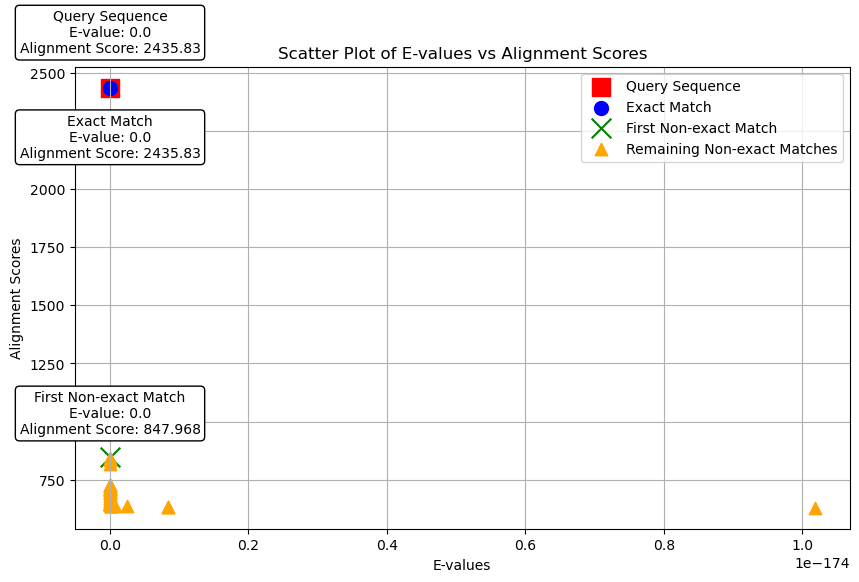

In [92]:
# Initialize variables to store information about the matches
exact_matches = []
non_exact_matches = []

# Plot scatter plot
plt.figure(figsize=(10, 6))

# Variables to ensure only the first non-exact match is annotated
annotate_first_non_exact_match = True

# Plot query sequence at index 0 with a different marker and annotations first
query_hsp = blast_result[0].hsps[0]
plt.scatter(query_hsp.evalue, query_hsp.bitscore, color='red', s=150, marker='s', label='Query Sequence')
plt.annotate(f'Query Sequence\nE-value: {query_hsp.evalue}\nAlignment Score: {query_hsp.bitscore}', 
             xy=(query_hsp.evalue, query_hsp.bitscore), xytext=(query_hsp.evalue, query_hsp.bitscore + 150), 
             ha='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))

# Process each hit to plot exact matches and identify non-exact matches
for i, hit in enumerate(blast_result[1:], 1):
    hsp = hit.hsps[0]
    if hsp.ident_num / len(hsp.query) == 1.0:  # Check if the alignment is an exact match
        exact_matches.append((hsp.evalue, hsp.bitscore))
    else:
        non_exact_matches.append((hsp.evalue, hsp.bitscore))

# Plot exact matches next
for evalue, score in exact_matches:
    plt.scatter(evalue, score, color='blue', s=100, marker='o', label='Exact Match' if 'Exact Match' not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.annotate(f'Exact Match\nE-value: {evalue}\nAlignment Score: {score}', 
                 xy=(evalue, score), xytext=(evalue, score - 300), ha='center', fontsize=10, 
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))

# Plot the first non-exact match
if non_exact_matches:
    hsp = non_exact_matches[0]
    plt.scatter(hsp[0], hsp[1], color='green', s=200, marker='x', label='First Non-exact Match')
    plt.annotate(f'First Non-exact Match\nE-value: {hsp[0]}\nAlignment Score: {hsp[1]}',
                 xy=(hsp[0], hsp[1]), xytext=(hsp[0], hsp[1] + 100),
                 ha='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))

# Plot remaining non-exact matches
for evalue, score in non_exact_matches[1:]:  # Skip the first non-exact match as it's already plotted
    plt.scatter(evalue, score, color='orange', s=80, marker='^', label='Remaining Non-exact Matches' if 'Remaining Non-exact Matches' not in plt.gca().get_legend_handles_labels()[1] else "")

plt.xlabel('E-values')
plt.ylabel('Alignment Scores')
plt.title('Scatter Plot of E-values vs Alignment Scores')
plt.legend()
plt.grid(True)
plt.show()
